In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os, glob

In [8]:
def plot_corr(data, figsize=(15,15)):
    '''
    Plot correlation 
    Args:
    - data: pd dataframe
    '''
    corr = data.corr()
    sns.set(font_scale=1.2)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(corr, mask=mask, square=True, 
                         vmin= -1, vmax=1,
                         cmap='RdBu_r', center=0, annot=True,
                        annot_kws={'fontsize':8})

In [43]:
path = os.path.join(os.path.dirname(os.getcwd()), '../Data/Extracted_data/')
os.chdir(path)

In [72]:
fatigue = pd.read_excel('FatigueSampleInventory.xlsx', 
                        index_col=' Specimen ID',
                        usecols=[' Specimen ID', 'Cycles at NDE Test', 'Cycles at Failure', 'Current Unfailed Cycles']
                       )
fatigue['f'] = fatigue['Cycles at NDE Test']/fatigue['Cycles at Failure']

NLE_raw = pd.read_csv('NLE.csv', index_col='Sample')

In [94]:
merged = NLE_raw.join([fatigue], how='left')
NLE = merged.copy()
NLE.reset_index(inplace=True)
NLE.columns

Index(['index', 'freq', 'S10', 'S11', 'S12', 'Cycles at NDE Test',
       'Cycles at Failure', 'Current Unfailed Cycles', 'f'],
      dtype='object')

In [95]:
NLE_plot = NLE[['index', 'freq', 'Cycles at NDE Test', 'S10', 'S11', 'S12']].melt(id_vars=['index', 'freq', 'Cycles at NDE Test'], value_name='NLE')

<AxesSubplot:>

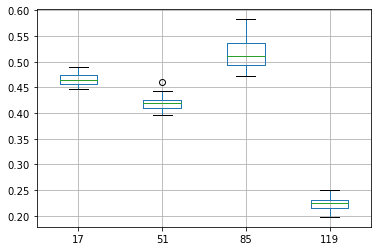

In [96]:
NLE['NLE_avg'] = NLE[['S10', 'S11', 'S12']].mean(axis=1)
pd.pivot_table(NLE, index='index' ,columns='freq', values='NLE_avg').boxplot()

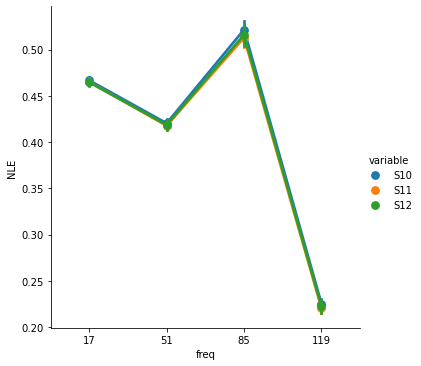

In [98]:
sns.catplot(y='NLE', x='freq', kind='point', hue='variable', aspect = 1,
            data=NLE_plot,
           sharex=False, sharey=False)

In [102]:
NLE_plot_2 = NLE[['index', 'freq', 'f', 'Cycles at NDE Test', 'S10', 'S11', 'S12']].melt(id_vars=['index', 'freq', 'f', 'Cycles at NDE Test'], value_name='NLE')

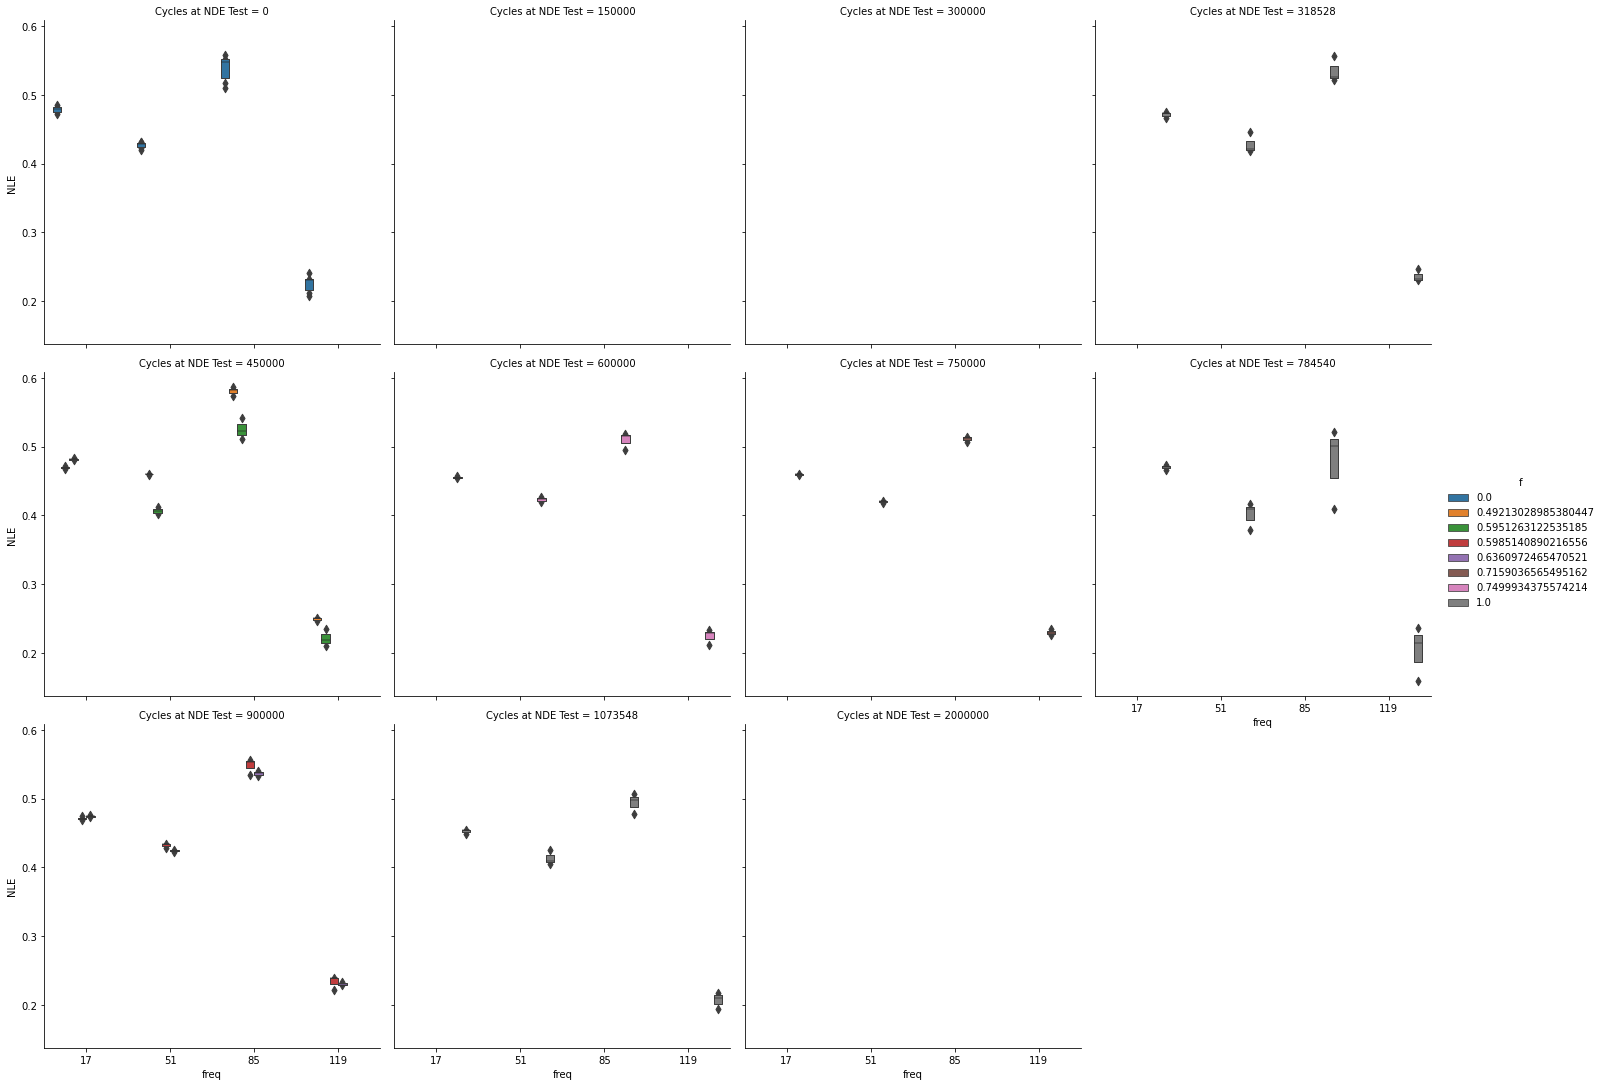

In [134]:
sns.catplot(y='NLE', x='freq', kind='boxen', hue='f', col='Cycles at NDE Test',
            data=NLE_plot_2, col_wrap=4, 
            )

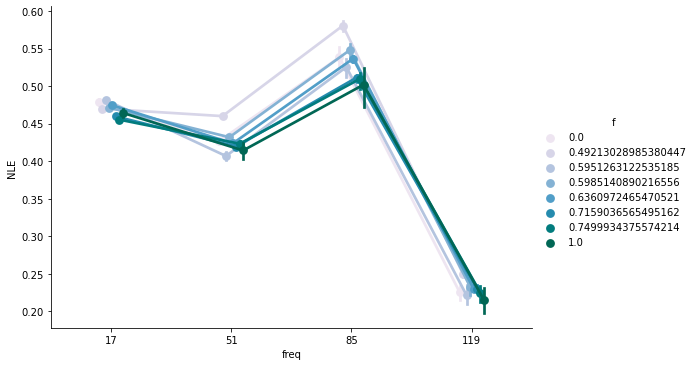

In [196]:
g = sns.catplot(y='NLE', x='freq', kind='point', hue='f', aspect=1.5,
            data=NLE_plot_2, palette=sns.color_palette('PuBuGn', n_colors=8), dodge=True,
               )